5. Pandas Visuals

Now that we have had time to prepare our data in pandas, we can run some quick visuals to gain a 
better understand what is going on.

We will cover in more detail later how to create some dynamic visuals in Matplotlib. But for now, we will take
a few minutes to discover some of the quick visuals you can create directly from the dataframe.

In [122]:
# Although we won't be working with Matplotlib directly yet, we will need it to be imported for this to work properly
# Let's start by importing our packages

import pandas as pd
import matplotlib as plt

In [123]:
# Next, let's get our data from the CSV file

data = pd.read_csv('StudentData.csv')
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       86 non-null     object 
 1   Age        87 non-null     float64
 2   Score Jan  86 non-null     float64
 3   Score Feb  87 non-null     float64
 4   Score Mar  88 non-null     int64  
 5   Country    85 non-null     object 
 6   Date       88 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 4.9+ KB
None


In [124]:
# Oh my! We cleaned the data from the previous exercise, but we never updated the original file.
# Let's quickly apply the data cleaning skills we learned previously to prepare our data for investigation

# First, we will remove those Null values
data.dropna(inplace = True)

# Second, let's quickly reformat the floats into ints
data['Age'] = data['Age'].astype('int')
data['Score Jan'] = data['Score Jan'].astype('int')
data['Score Feb'] = data['Score Feb'].astype('int')
data['Score Mar'] = data['Score Mar'].astype('int')

# Lastly, let's remove the duplicate Dylan Sanders
data.drop_duplicates(subset='Name', inplace = True)

# Let's check our data to make sure everything is good
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 87
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       80 non-null     object
 1   Age        80 non-null     int32 
 2   Score Jan  80 non-null     int32 
 3   Score Feb  80 non-null     int32 
 4   Score Mar  80 non-null     int32 
 5   Country    80 non-null     object
 6   Date       80 non-null     object
dtypes: int32(4), object(3)
memory usage: 3.8+ KB
None
               Name  Age  Score Jan  Score Feb  Score Mar         Country  \
0     Dylan Sanders   21         56         79         31  United Kingdom   
2    Gabriel Routin   52         38         48         28    South Africa   
3       Caleb Sheen   33         83         62         27       Australia   
4      Aundry Smith   46         70         56         84         Germany   
5  Phillip Johonson   55         55         61         44   South America   

         Date  
0  2023/09/01

As a Data Analyst, you likely will spend a lot of time creating fantastic visuals and building detailed reports. We have a dedicated section on using the Matplotlib package for this.

This being said, often while investigating data, we don't need a fancy plot or chart. We just need to quickly create a visual to help us, as a DA, understand the data ourselves -
before creating something for a non data fluent audience.

One quick and easy way to create a visual us plotting it directly from the dataframe. Let's give it a gander!

In [125]:
# To create a basic plot from our data, we can pick the fields we want and reference them in the plot

# We fetch the fields we want and assign them as a new variable.
# By using double square brackets, we create a new dataframe object called 'fields' instead of a series object. 
# This also allows us to fetch more than one field, a pandas series object cannot have more than one field.

fields = data[['Score Jan','Score Feb','Score Mar']]
print(type(fields))

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

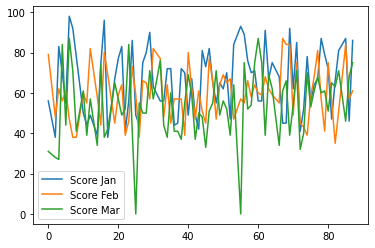

In [126]:
# Now let's create a basic column chart from this dataset

# By default, if we just run the plot method - it will try to map the fields as a line chart
fields.plot()

<AxesSubplot:>

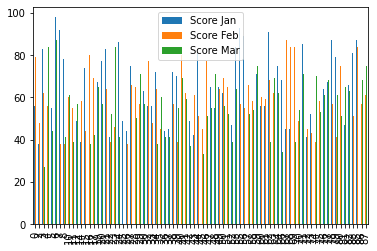

In [127]:
# We can use the kind parameter in the plot method to choose the chart type

fields.plot(kind='bar')

AxesSubplot(0.125,0.125;0.775x0.755)


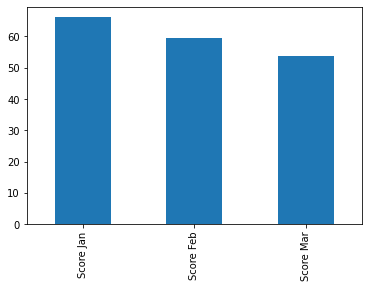

In [128]:
# Okay, we are getting there. Clearly we need to adjust our data further for use in the plot.
# This is normal in the process of creating visuals, you will often have to make further adjustments to already clean data for us in charts.

# Let's convert our dataframe to show the average score for each month, and plot this on a column chart
barData = fields.mean().plot(kind='bar')
print(barData)

# There we go, this is a lot more readable

AxesSubplot(0.125,0.125;0.775x0.755)


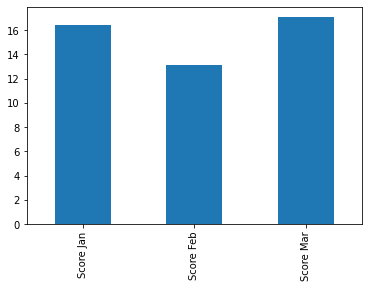

In [129]:
# Let's see what the data looks like if we use standard deviation of each field instead of average scores

stdScores = fields.std().plot(kind='bar')
print(stdScores)

There's clearly a lot more deviation in scores over Jan and Mar. 

<AxesSubplot:ylabel='Frequency'>

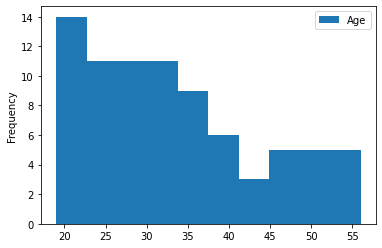

In [130]:
# Let's understand our learners further. I want to find how old most learners are. We can use a Histogram for this

# We will fetch some fresh data, remebering to use double square brackets to create a dataframe object
ages = data[['Age']]

# Now we can plot our ages, this time using the hist type in our kind parameter
ages.plot(kind='hist')

Most of our learners seem to be focused around their 20's and early 30's. This is useful to know

I wonder if there is a correlation between how old a learner is and how well they are doing in this particular exam. Let's see.

In [131]:
# Let's first create a new field in our dataframe by fetching the average of scores for all 3 months.
# Then using this average in our new field

# The axis parameter in the mean method ensures our resulting calculation is run across the record rather than down the column
data['Average Score'] = data[['Score Jan','Score Feb','Score Mar']].mean(axis=1)

# We could also run the following by summing all three fields as 1D arrays to get the same result, but the code is a lot less efficient
# This would also not work as an average, only sum. Hence why it's not used as our primary example. But we will keep it anyway.
data['Total Score'] = data['Score Jan'] + data['Score Feb'] + data['Score Mar']

print(data)

                Name  Age  Score Jan  Score Feb  Score Mar         Country  \
0      Dylan Sanders   21         56         79         31  United Kingdom   
2     Gabriel Routin   52         38         48         28    South Africa   
3        Caleb Sheen   33         83         62         27       Australia   
4       Aundry Smith   46         70         56         84         Germany   
5   Phillip Johonson   55         55         61         44   South America   
..               ...  ...        ...        ...        ...             ...   
82  Youssef Atkinson   21         66         35         63  United Kingdom   
83         Safa Lara   27         81         51         71       Australia   
85    Subhaan Orozco   21         87         84         46  United Kingdom   
86     Tatiana Walsh   24         46         57         68  United Kingdom   
87      Alicia Watts   35         86         61         75  United Kingdom   

          Date  Average Score  Total Score  
0   2023/09/01    

<AxesSubplot:xlabel='Age', ylabel='Average Score'>

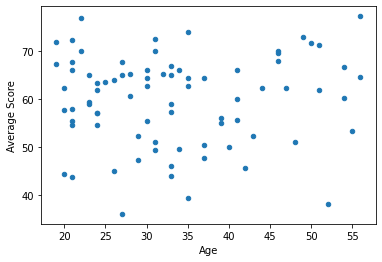

In [132]:
# Now we can plot our scatterchart

# Unlike previous example, with a scatterplot we don't pick out the fields and assign them as new variables
# We reference the original table directly and specify the field names as x and y parameters
data.plot(kind='scatter',x='Age',y='Average Score')

There does seem to be a mild positive correlation between age and average score. Considering how much data we have, this might just be due to
having fewer records that belong to older learners. Remember the histogram we built. Few learners are actually older than 40. We do not have
enough data to make a hypothesis. 

Let's filter our data to focus on the majority of learners, those that are younger than 40

<AxesSubplot:xlabel='Age', ylabel='Average Score'>

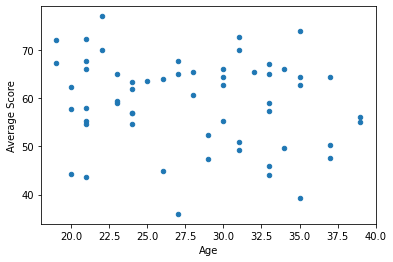

In [133]:
scatterData = data[data['Age'] < 40]

scatterData.plot(kind='scatter', x='Age', y='Average Score')

I think we can clearly say there is no clear corerlation between age and score.

It's very important as a Data Analyst to ask the right questions. Making bad assumptions can lead to inaccurate results.

We don't have the time to demonstrate using every plot type here, so let's move on to our final session where we will
work with Matplotlib in more detail